In [ ]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
    !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
    !git pull

In [ ]:
import os
cwd = os.getcwd()
if cwd[0:2] != "C:":
    from google.colab import drive
    drive.mount('/content/gdrive',force_remount=True)
    %cd "/content/gdrive/My Drive/Projects"
#     !git clone https://github.com/ai357060/modelF.git
    import sys
    root_dir="/content/gdrive/My Drive/Projects/modelF"
    sys.path.append(root_dir)
    %cd "/content/gdrive/My Drive/Projects/modelF/wm"
#     !git pull

In [ ]:
!pip install --upgrade sklearn
!pip install --upgrade protobuf 
!pip install imblearn

In [3]:
import model_hyper
import importlib
importlib.reload(model_hyper)
from model_hyper import *

masterframe, model = runhypermodel('v10b','all',[0],[['svc']],testone=False,has_y=False,testsize=0.25)

0.9511800095877287
0.9511800095877282


KeyboardInterrupt: 

In [29]:
oo=masterframe.copy()

In [74]:
masterframe=oo.copy()

In [82]:
columns=masterframe.filter(regex='slope').columns

def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# minmax = masterframe[columns].apply(minMax)
minmax = masterframe.apply(minMax)

In [83]:
minmax

,id,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,day__1,day__2,day__3,day__4,day__5,day__6,day__7,day__8,day__9,day__10,day__11,day__12,day__13,day__14,day__15,day__16,day__17,day__18,day__19,day__20,day__21,day__22,day__23,day__24,day__25,day__26,day__27,day__28,day__29,day__30,day__31,weekday__1,weekday__2,weekday__3,weekday__4,weekday__6,weekday__7,momentum3open,momentum3close,momentum3open_div,momentum3close_div,momentum4open,momentum4close,momentum4open_div,momentum4close_div,momentum5open,momentum5close,momentum5open_div,momentum5close_div,momentum8open,momentum8close,momentum8open_div,momentum8close_div,momentum9open,momentum9close,momentum9open_div,momentum9close_div,momentum10open,momentum10close,momentum10open_div,momentum10close_div,stochastic3C,stochastic3H,stochastic3L,stochastic3CL,stochastic3HL,stochastic3rCL,stochastic3rHL,stochastic3K,stochastic3D,stochastic3HistKD,stochastic3K_slope3,stochastic3K_slope4,stochastic3K_slope5,stochastic3K_slope10,stochastic3K_slope20,stochastic3K_slope30,stochastic3HistKD_slope3,stochastic3HistKD_slope4,stochastic3HistKD_slope5,stochastic3HistKD_slope10,stochastic3HistKD_slope20,stochastic3HistKD_slope30,stochastic4C,stochastic4H,stochastic4L,stochastic4CL,stochastic4HL,stochastic4rCL,stochastic4rHL,stochastic4K,stochastic4D,stochastic4HistKD,stochastic4K_slope3,stochastic4K_slope4,stochastic4K_slope5,stochastic4K_slope10,stochastic4K_slope20,stochastic4K_slope30,stochastic4HistKD_slope3,stochastic4HistKD_slope4,stochastic4HistKD_slope5,stochastic4HistKD_slope10,stochastic4HistKD_slope20,stochastic4HistKD_slope30,stochastic5C,stochastic5H,stochastic5L,stochastic5CL,stochastic5HL,stochastic5rCL,stochastic5rHL,stochastic5K,stochastic5D,stochastic5HistKD,stochastic5K_slope3,stochastic5K_slope4,stochastic5K_slope5,stochastic5K_slope10,stochastic5K_slope20,stochastic5K_slope30,stochastic5HistKD_slope3,stochastic5HistKD_slope4,stochastic5HistKD_slope5,stochastic5HistKD_slope10,stochastic5HistKD_slope20,stochastic5HistKD_slope30,stochastic8C,stochastic8H,stochastic8L,stochastic8CL,stochastic8HL,stochastic8rCL,stochastic8rHL,stochastic8K,stochastic8D,stochastic8HistKD,stochastic8K_slope3,stochastic8K_slope4,stochastic8K_slope5,stochastic8K_slope10,stochastic8K_slope20,stochastic8K_slope30,stochastic8HistKD_slope3,stochastic8HistKD_slope4,stochastic8HistKD_slope5,stochastic8HistKD_slope10,stochastic8HistKD_slope20,stochastic8HistKD_slope30,stochastic9C,stochastic9H,stochastic9L,stochastic9CL,stochastic9HL,stochastic9rCL,stochastic9rHL,stochastic9K,stochastic9D,stochastic9HistKD,stochastic9K_slope3,stochastic9K_slope4,stochastic9K_slope5,stochastic9K_slope10,stochastic9K_slope20,stochastic9K_slope30,stochastic9HistKD_slope3,stochastic9HistKD_slope4,stochastic9HistKD_slope5,stochastic9HistKD_slope10,stochastic9HistKD_slope20,stochastic9HistKD_slope30,stochastic10C,stochastic10H,stochastic10L,stochastic10CL,stochastic10HL,stochastic10rCL,stochastic10rHL,stochastic10K,stochastic10D,stochastic10HistKD,stochastic10K_slope3,stochastic10K_slope4,stochastic10K_slope5,stochastic10K_slope10,stochastic10K_slope20,stochastic10K_slope30,stochastic10HistKD_slope3,stochastic10HistKD_slope4,stochastic10HistKD_slope5,stochastic10HistKD_slope10,stochastic10HistKD_slope20,stochastic10HistKD_slope30,williams6C,williams6H,williams6L,williams6R,williams7C,williams7H,williams7L,williams7R,williams8C,williams8H,williams8L,williams8R,williams9C,williams9H,williams9L,williams9R,williams10C,williams10H,williams10L,williams10R,proc2close_pct,proc2tp3logdiff,proc12close_pct,proc12tp3logdiff,proc13close_pct,proc13tp3logdiff,proc14close_pct,proc14tp3logdiff,proc15close_pct,proc15tp3logdiff,wadl2wad,wadl2wad_slope3,wadl2wad_slope4,wadl2wad_slope5,wadl2wad_slope10,wadl2wad_slope20,wadl2wad_slope30,wadl15wad,wadl15wad_slope3,wadl15wad_slope4,wadl15wad_slope5,wadl15wad_slope10,wadl15wad_slope20,wadl15wad_slope30,macd15MACD,macd15SigMACD,macd15HistMACD,macd15

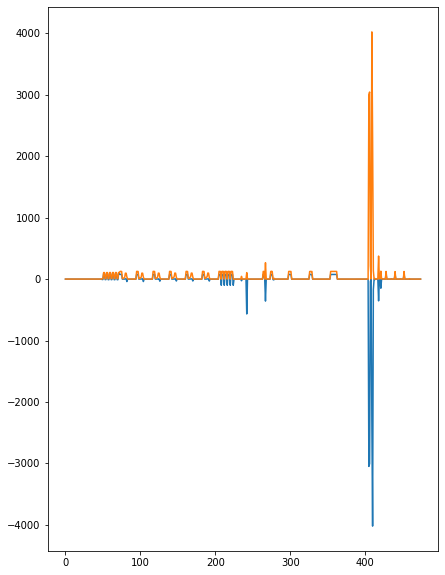

In [84]:
import matplotlib.pyplot as plt
slicemin = minmax.iloc[0,1:]
slicemax = minmax.iloc[1,1:]
x = range(0,len(slicemin))
y1 = slicemin
y2 = slicemax
fig = plt.figure(figsize=(7,10))
# plt.axis('off')
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

In [33]:
#skolowanie blokowe dla kilku kolumn
from sklearn.preprocessing import minmax_scale

scaler = MinMaxScaler()

fourier_columns=masterframe.filter(regex='fourier').columns
one_column = masterframe[fourier_columns].values.reshape([-1,1])
result_one_column = scaler.fit_transform(one_column)
masterframe[fourier_columns] = result_one_column.reshape(masterframe[fourier_columns].shape)
# masterframe[fourier_columns] = minmax_scale(fourier_columns)

In [41]:
# skalowanie per kolumna dla grupy kolumn
from sklearn.preprocessing import minmax_scale

scaler = MinMaxScaler()

fourier_columns=masterframe.filter(regex='fourier').columns
masterframe[fourier_columns] = scaler.fit_transform(masterframe[fourier_columns])
# masterframe[fourier_columns] = minmax_scale(fourier_columns)

In [17]:
test_df = masterframe.iloc[:,1:-2]
test_dfval = test_df.values
scaler = MinMaxScaler()
one_column = test_dfval.reshape([-1,1])
result_one_column = scaler.fit_transform(one_column)
df = result_one_column.reshape(test_df.shape)

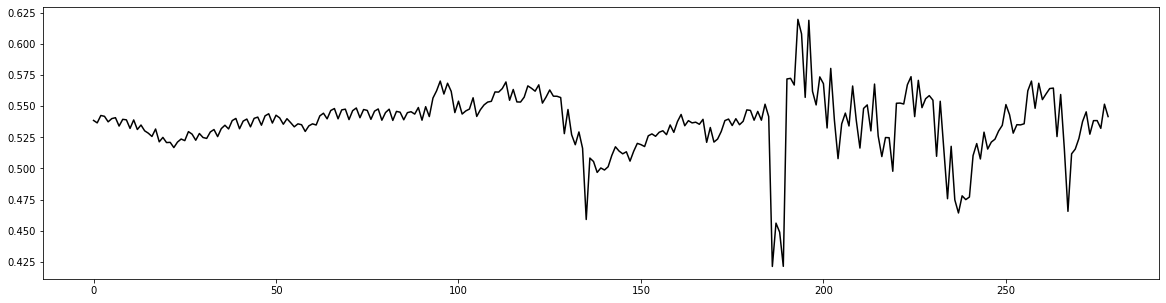

In [39]:
import matplotlib.pyplot as plt
slice56 = df[-1,:]
x = range(0,len(slice56))
y = slice56
fig = plt.figure(figsize=(20,5))
# plt.axis('off')
# plt.ylim(0,1)
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y,color='black')
plt.show()

fig.savefig('books_read.png', dpi=100, bbox_inches='tight', pad_inches=0,transparent=True)

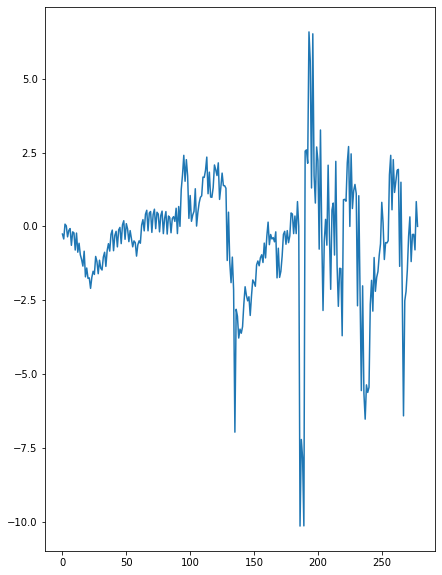

In [46]:
import matplotlib.pyplot as plt
slice56 = test_df.iloc[-1,:]
x = range(0,len(slice56))
y = slice56
fig = plt.figure(figsize=(7,10))
# plt.axis('off')
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y)
plt.show()

fig.savefig('books_read.png', dpi=100)

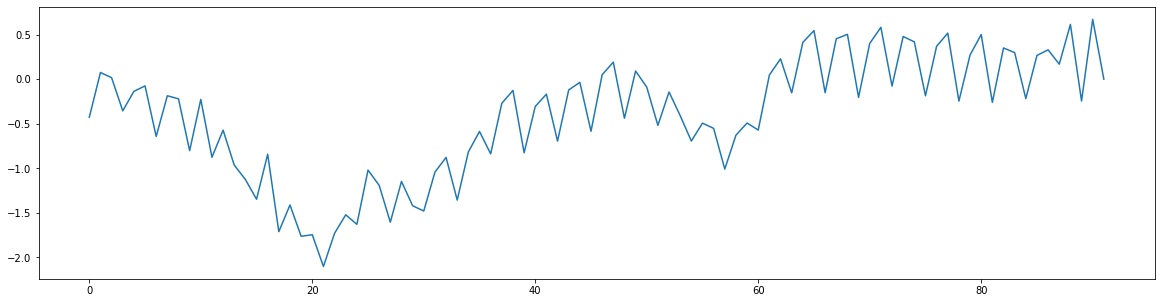

In [41]:
import matplotlib.pyplot as plt
slice56 = test_df.iloc[-1,1:93]
x = range(0,len(slice56))
y = slice56
fig = plt.figure(figsize=(20,5))
# plt.axis('off')
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y)
plt.show()

fig.savefig('books_read.png', dpi=100)

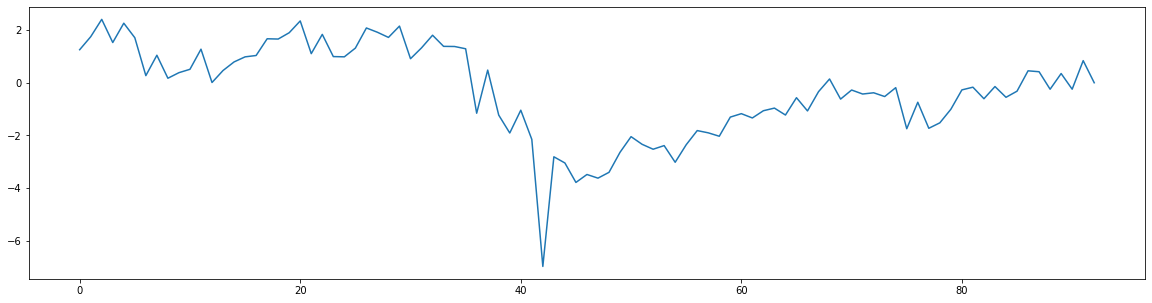

In [42]:
import matplotlib.pyplot as plt
slice56 = test_df.iloc[-1,93:186]
x = range(0,len(slice56))
y = slice56
fig = plt.figure(figsize=(20,5))
# plt.axis('off')
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y)
plt.show()

fig.savefig('books_read.png', dpi=100)

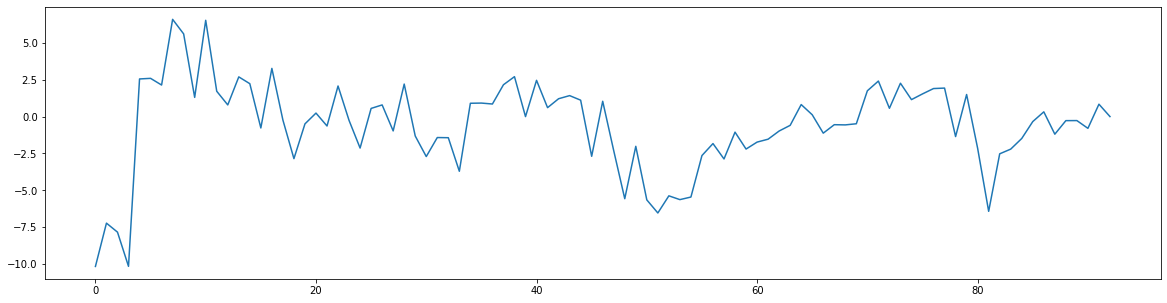

In [43]:
import matplotlib.pyplot as plt
slice56 = test_df.iloc[-1,186:]
x = range(0,len(slice56))
y = slice56
fig = plt.figure(figsize=(20,5))
# plt.axis('off')
# plt.plot(x, y,'o',linestyle='None', markersize = 1.0,color='black')
plt.plot(x, y)
plt.show()

fig.savefig('books_read.png', dpi=100)

In [6]:
test_df.iloc[:,201:]

,hM130M1hist_close_26_diff,hM130M1hist_low_26_diff,hM130M1hist_high_26_diff,hM130M1hist_close_25_diff,hM130M1hist_low_25_diff,hM130M1hist_high_25_diff,hM130M1hist_close_24_diff,hM130M1hist_low_24_diff,hM130M1hist_high_24_diff,hM130M1hist_close_23_diff,hM130M1hist_low_23_diff,hM130M1hist_high_23_diff,hM130M1hist_close_22_diff,hM130M1hist_low_22_diff,hM130M1hist_high_22_diff,hM130M1hist_close_21_diff,hM130M1hist_low_21_diff,hM130M1hist_high_21_diff,hM130M1hist_close_20_diff,hM130M1hist_low_20_diff,hM130M1hist_high_20_diff,hM130M1hist_close_19_diff,hM130M1hist_low_19_diff,hM130M1hist_high_19_diff,hM130M1hist_close_18_diff,hM130M1hist_low_18_diff,hM130M1hist_high_18_diff,hM130M1hist_close_17_diff,hM130M1hist_low_17_diff,hM130M1hist_high_17_diff,hM130M1hist_close_16_diff,hM130M1hist_low_16_diff,hM130M1hist_high_16_diff,hM130M1hist_close_15_diff,hM130M1hist_low_15_diff,hM130M1hist_high_15_diff,hM130M1hist_close_14_diff,hM130M1hist_low_14_diff,hM130M1hist_high_14_diff,hM130M1hist_close_13_diff,hM130M1hist_low_13_diff,hM130M1hist_high_13_diff,hM130M1hist_close_12_diff,hM130M1hist_low_12_diff,hM130M1hist_high_12_diff,hM130M1hist_close_11_diff,hM130M1hist_low_11_diff,hM130M1hist_high_11_diff,hM130M1hist_close_10_diff,hM130M1hist_low_10_diff,hM130M1hist_high_10_diff,hM130M1hist_close_9_diff,hM130M1hist_low_9_diff,hM130M1hist_high_9_diff,hM130M1hist_close_8_diff,hM130M1hist_low_8_diff,hM130M1hist_high_8_diff,hM130M1hist_close_7_diff,hM130M1hist_low_7_diff,hM130M1hist_high_7_diff,hM130M1hist_close_6_diff,hM130M1hist_low_6_diff,hM130M1hist_high_6_diff,hM130M1hist_close_5_diff,hM130M1hist_low_5_diff,hM130M1hist_high_5_diff,hM130M1hist_close_4_diff,hM130M1hist_low_4_diff,hM130M1hist_high_4_diff,hM130M1hist_close_3_diff,hM130M1hist_low_3_diff,hM130M1hist_high_3_diff,hM130M1hist_close_2_diff,hM130M1hist_low_2_diff,hM130M1hist_high_2_diff,hM130M1hist_close_1_diff,hM130M1hist_low_1_diff,hM130M1hist_high_1_diff
652,-6.562375,-6.805231,0.756955,-7.299354,-9.204357,-5.962068,-7.875481,-9.490317,-5.783343,-9.930823,-10.330326,-7.553775,-11.781156,-11.698101,-9.235896,-8.324397,-11.992472,-7.554827,-13.918501,-13.807061,-4.943333,-6.725331,-13.586282,-6.268004,-6.577094,-8.667129,-2.214092,-8.946782,-10.045417,-5.308144,-5.814883,-9.467188,-4.737274,-7.750373,-8.216110,-5.138880,-6.699047,-7.875481,-5.556256,-10.969532,-11.379549,-5.812780,-15.043420,-15.132782,-10.198911,-15.012931,-15.479720,-11.367985,-13.894321,-15.749910,-12.429824,-13.153136,-13.892218,-10.675161,-9.840409,-13.743981,-9.696377,-12.783069,-12.579112,-8.542021,-8.529405,-12.996488,-8.544124,-5.367018,-10.620492,-5.434303,-4.873946,-7.239429,-3.613406,-7.469669,-7.910175,-4.609012,-3.565045,-8.192981,-3.452554,-0.121954,-3.722744,-0.232343
653,-6.916672,-6.805231,0.326962,-7.653651,-9.204357,-6.392060,-8.229778,-9.490317,-6.213335,-10.285119,-10.330326,-7.983767,-12.135453,-11.698101,-9.665889,-8.678694,-11.992472,-7.984819,-14.272798,-13.807061,-5.373326,-7.079627,-13.586282,-6.697996,-6.931390,-8.667129,-2.644084,-9.301079,-10.045417,-5.738136,-6.169179,-9.467188,-5.167266,-8.104670,-8.216110,-5.568872,-7.053344,-7.875481,-5.986249,-11.323829,-11.379549,-6.242772,-15.397716,-15.132782,-10.628903,-15.367228,-15.479720,-11.797977,-14.248617,-15.749910,-12.859816,-13.507433,-13.892218,-11.105153,-10.194705,-13.743981,-10.126369,-13.137366,-12.579112,-8.972014,-8.883702,-12.996488,-8.974116,-5.721315,-10.620492,-5.864295,-5.228243,-7.239429,-4.043399,-7.823966,-7.910175,-5.039004,-3.919342,-8.192981,-3.882546,-0.476251,-3.722744,-0.662335
654,-8.110978,-6.805231,-0.683362,-8.847957,-9.204357,-7.402384,-9.424084,-9.490317,-7.223659,-11.479425,-10.330326,-8.994091,-13.329759,-11.698101,-10.676213,-9.873000,-11.992472,-8.995143,-15.467104,-13.807061,-6.383650,-8.273933,-13.586282,-7.708320,-8.125696,-8.667129,-3.654408,-10.495385,-10.045417,-6.748460,-7.363485,-9.467188,-6.177590,-9.298976,-8.216110,-6.579196,-8.247650,-7.875481,-6.996573,-12.518135,-11.379549,-7.253096,-16.592022,-15.1

In [21]:
test_df.iloc[1,:93]

hD130D1hist_low_30_diff     -6.052482
hD130D1hist_high_30_diff    -5.874808
hD130D1hist_close_30_diff   -5.789651
hD130D1hist_low_29_diff     -6.210181
hD130D1hist_high_29_diff    -5.133623
hD130D1hist_close_29_diff   -4.982233
hD130D1hist_low_28_diff     -4.950693
hD130D1hist_high_28_diff    -5.061082
hD130D1hist_close_28_diff   -5.301836
hD130D1hist_low_27_diff     -4.902332
hD130D1hist_high_27_diff    -4.099119
hD130D1hist_close_27_diff   -4.124351
hD130D1hist_low_26_diff     -4.116991
hD130D1hist_high_26_diff    -4.164301
hD130D1hist_close_26_diff   -4.325154
hD130D1hist_low_25_diff     -4.343027
hD130D1hist_high_25_diff    -4.394541
hD130D1hist_close_25_diff   -4.434492
hD130D1hist_low_24_diff     -4.065477
hD130D1hist_high_24_diff    -3.882546
hD130D1hist_close_24_diff   -3.919342
hD130D1hist_low_23_diff     -3.600791
hD130D1hist_high_23_diff    -3.194979
hD130D1hist_close_23_diff   -3.268572
hD130D1hist_low_22_diff     -2.933199
hD130D1hist_high_22_diff    -3.152926
hD130D1hist_

In [22]:
test_df.iloc[1,93:186]

hW130W1hist_low_30_diff      -9.222229
hW130W1hist_high_30_diff     -8.972014
hW130W1hist_close_30_diff    -9.864589
hW130W1hist_low_29_diff      -9.718455
hW130W1hist_high_29_diff     -9.324208
hW130W1hist_close_29_diff   -10.258836
hW130W1hist_low_28_diff     -11.690742
hW130W1hist_high_28_diff    -10.379739
hW130W1hist_close_28_diff   -12.145966
hW130W1hist_low_27_diff     -12.390925
hW130W1hist_high_27_diff    -11.584558
hW130W1hist_close_27_diff   -12.821968
hW130W1hist_low_26_diff     -12.808301
hW130W1hist_high_26_diff    -12.317332
hW130W1hist_close_26_diff   -12.203789
hW130W1hist_low_25_diff     -12.047141
hW130W1hist_high_25_diff    -10.110599
hW130W1hist_close_25_diff   -11.030509
hW130W1hist_low_24_diff     -10.333480
hW130W1hist_high_24_diff     -9.559705
hW130W1hist_close_24_diff   -10.068546
hW130W1hist_low_23_diff      -9.615425
hW130W1hist_high_23_diff     -9.569167
hW130W1hist_close_23_diff    -9.712147
hW130W1hist_low_22_diff     -10.190500
hW130W1hist_high_22_diff 

In [23]:
test_df.iloc[1,186:]

hM130M1hist_low_30_diff      -1.596964
hM130M1hist_high_30_diff      2.343405
hM130M1hist_close_30_diff     2.190963
hM130M1hist_low_29_diff       0.624487
hM130M1hist_high_29_diff      3.008894
hM130M1hist_close_29_diff     2.306609
hM130M1hist_low_28_diff       0.106184
hM130M1hist_high_28_diff      3.519838
hM130M1hist_close_28_diff     2.938455
hM130M1hist_low_27_diff      -0.440505
hM130M1hist_high_27_diff      3.395782
hM130M1hist_close_27_diff    -0.713850
hM130M1hist_low_26_diff      -6.805231
hM130M1hist_high_26_diff      0.326962
hM130M1hist_close_26_diff    -6.916672
hM130M1hist_low_25_diff      -9.204357
hM130M1hist_high_25_diff     -6.392060
hM130M1hist_close_25_diff    -7.653651
hM130M1hist_low_24_diff      -9.490317
hM130M1hist_high_24_diff     -6.213335
hM130M1hist_close_24_diff    -8.229778
hM130M1hist_low_23_diff     -10.330326
hM130M1hist_high_23_diff     -7.983767
hM130M1hist_close_23_diff   -10.285119
hM130M1hist_low_22_diff     -11.698101
hM130M1hist_high_22_diff 